Peer-graded Assignment: Capstone Project - The Battle of Neighborhoods (Week 1)

In a city of your choice, if someone is looking to open a restaurant, where would you recommend that they open it? Similarly, if a contractor is trying to start their own business, where would you recommend that they setup their office?

I've decided to focus my project in the city of Warsaw, capital of Poland. Our customer wants to establish a business in the city, but he doesn't know which kind of business. Anyway it will be related to food, like a restaurant, a cafeteria or similar. He doesn't want a business which is very present in the city. Instead he wants something with an average number of venues.

In [1]:
#install required libraries.
!pip install geopy    
!pip install folium   
!pip install geocoder
!pip install bs4

     |████████████████████████████████| 122kB 6.3MB/s eta 0:00:01
     |████████████████████████████████| 102kB 4.6MB/s ta 0:00:011
     |████████████████████████████████| 92kB 4.4MB/s eta 0:00:011
     |████████████████████████████████| 829kB 6.3MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built future
     |████████████████████████████████| 122kB 14.7MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/a0/b0/b2/4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built bs4


In [2]:
#Import required libraries 
import numpy as np 
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt # for graphical usage 

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geocoder # to get coordinates

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library
from folium import plugins
from folium.plugins import HeatMap

from bs4 import BeautifulSoup 
import requests

print('Libraries imported.')

Libraries imported.


In [3]:
# Coordinates of Warsaw, in Poland
from  geopy.geocoders import Nominatim
geolocator = Nominatim()
city ="Warsaw"
country ="Poland"
loc = geolocator.geocode(city+','+ country)
print("The coordinates of Warsaw, capital of Poland are:\nlatitude:" ,loc.latitude,"longtitude:" ,loc.longitude)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.22.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


The coordinates of Warsaw, capital of Poland are:
latitude: 52.2319581 longtitude: 21.0067249


In [4]:
# Read Warsaw wikipedia source code to extract the table with the required data.
!pip install lxml
website=requests.get('https://en.wikipedia.org/wiki/Districts_of_Warsaw').text
soup = BeautifulSoup(website, features='html')
print(soup.prettify())

     |████████████████████████████████| 5.5MB 4.4MB/s eta 0:00:01     |███████████████████             | 3.3MB 4.4MB/s eta 0:00:01     |███████████████████████████████ | 5.3MB 4.4MB/s eta 0:00:01
<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Districts of Warsaw - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"7e3a365d-bdf6-4215-8485-c7c731e8939c","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Districts_of_Warsaw","wgTitle":"Districts of Warsaw","wgCurRevisionId":960882601,"wgRevisionId":960882601,"wgArticleId":56372451,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction"

In [5]:
# Find the table we need in the code above:
right_table=soup.find('table', class_='wikitable sortable')
right_table

<table class="wikitable sortable" style="float:left;">

<tbody><tr>
<th>District</th>
<th>Population</th>
<th>Area
</th></tr>
<tr>
<td><a href="/wiki/Mokot%C3%B3w" title="Mokotów">Mokotów</a></td>
<td align="right">220,682</td>
<td>35.4 km<sup>2</sup> (13.7 sq mi)
</td></tr>
<tr>
<td><a class="mw-redirect" href="/wiki/Praga_Po%C5%82udnie" title="Praga Południe">Praga Południe</a></td>
<td align="right">178,665</td>
<td>22.4 km<sup>2</sup> (8.6 sq mi)
</td></tr>
<tr>
<td><a href="/wiki/Ursyn%C3%B3w" title="Ursynów">Ursynów</a></td>
<td align="right">145,938</td>
<td>48.6 km<sup>2</sup> (18.8 sq mi)
</td></tr>
<tr>
<td><a href="/wiki/Wola" title="Wola">Wola</a></td>
<td align="right">137,519</td>
<td>19.26 km<sup>2</sup> (7.44 sq mi)
</td></tr>
<tr>
<td><a href="/wiki/Bielany" title="Bielany">Bielany</a></td>
<td align="right">132,683</td>
<td>32.3 km<sup>2</sup> (12.5 sq mi)
</td></tr>
<tr>
<td><a href="/wiki/Targ%C3%B3wek" title="Targówek">Targówek</a></td>
<td align="right">123,278</t

In [6]:
# Scrap the data and append to respective lists

A=[]
B=[]
C=[]

for row in right_table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==3:
        A.append(cells[0].find(text=True))
        B.append(cells[1].find(text=True))
        C.append(cells[2].find(text=True))
        
df=pd.DataFrame(A,columns=['District'])
df['Population']=B
df['Area']=C
df

,District,Population,Area
0,Mokotów,"220,682",35.4 km
1,Praga Południe,"178,665",22.4 km
2,Ursynów,"145,938",48.6 km
3,Wola,"137,519",19.26 km
4,Bielany,"132,683",32.3 km
5,Targówek,"123,278",24.37 km
6,Śródmieście,"122,646",15.57 km
7,Bemowo,"115,873",24.95 km
8,Białołęka,"96,588",73.04 km
9,Ochota,"84,990",09.7 km


In [7]:
# Delete the last row 'Total'
df=df[df.District != 'Total']
df

,District,Population,Area
0,Mokotów,"220,682",35.4 km
1,Praga Południe,"178,665",22.4 km
2,Ursynów,"145,938",48.6 km
3,Wola,"137,519",19.26 km
4,Bielany,"132,683",32.3 km
5,Targówek,"123,278",24.37 km
6,Śródmieście,"122,646",15.57 km
7,Bemowo,"115,873",24.95 km
8,Białołęka,"96,588",73.04 km
9,Ochota,"84,990",09.7 km


In [8]:
#neighborhoodList = []
#df_neighborhood = pd.DataFrame({"District": neighborhoodList})

In [9]:
# define a function to get coordinates
address='Warsaw, Poland'
def get_latlng(district):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, {}'.format(district,address))
        lat_lng_coords = g.latlng
    return lat_lng_coords

coords = [ get_latlng(district) for district in df["District"].tolist() ]

df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

# merge the coordinates into the original dataframe
df['Latitude'] = df_coords['Latitude']
df['Longitude'] = df_coords['Longitude']
print("Geographical coordinates of each district are:")
df

Geographical coordinates of each district are:


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,District,Population,Area,Latitude,Longitude
0,Mokotów,"220,682",35.4 km,52.19539,21.00850
1,Praga Południe,"178,665",22.4 km,52.23633,21.09840
2,Ursynów,"145,938",48.6 km,52.15418,21.03786
3,Wola,"137,519",19.26 km,52.23903,20.97123
4,Bielany,"132,683",32.3 km,52.27697,20.94778
5,Targówek,"123,278",24.37 km,52.27726,21.06594
6,Śródmieście,"122,646",15.57 km,52.23560,21.01037
7,Bemowo,"115,873",24.95 km,52.25269,20.91244
8,Białołęka,"96,588",73.04 km,52.31097,20.99324
9,Ochota,"84,990",09.7 km,52.21314,20.97069


In [10]:
#create map of Warsaw with data above:

location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

mapwarsaw= folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng,  neighborhood in zip(df['Latitude'], df['Longitude'], df['District']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(mapwarsaw)  
    
mapwarsaw

In [11]:
CLIENT_ID='TGCAXBAI4FAMRAPYOTQS1SP3HUOSWNZ0HP5AZIOPXX1FCFKI'
CLIENT_SECRET='0YZ5IEMYMXPX2UQHX3AL03002OO0NSZWS4S3BPM1YYD3RM3R'
VERSION = '20180604'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
radius = 500
#print(search_query + ' .... OK!')


Your credentails:
CLIENT_ID: TGCAXBAI4FAMRAPYOTQS1SP3HUOSWNZ0HP5AZIOPXX1FCFKI
CLIENT_SECRET:0YZ5IEMYMXPX2UQHX3AL03002OO0NSZWS4S3BPM1YYD3RM3R


SEARCH FOR VENUES IN WARSAW

In [13]:
LIMIT = 100

def getNeighborhoodVenues( latitude, longitude,district, radius=1000 ):
    venues = []
    for lat, long, district in zip(latitude, longitude ,district):

        # create the API request URL
        url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
            CLIENT_ID,
            CLIENT_SECRET,
            VERSION,
            lat,
            long,
            radius, 
            LIMIT)

        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']

        # return only relevant information for each nearby venue
        for venue in results:
            venues.append((
                district,
                lat, 
                long, 
                venue['venue']['name'], 
                venue['venue']['id'], 
                venue['venue']['location']['lat'], 
                venue['venue']['location']['lng'],  
                venue['venue']['location']['distance'],  
                venue['venue']['categories'][0]['name']))
    
    # convert the venues list into a DataFrame
    venues = pd.DataFrame(venues)
    # define the column names
    venues.columns = ['District', 'Latitude', 'Longitude', 'VenueName', 'VenueId', 'VenueLatitude', 'VenueLongitude','VenueDistance','VenueCategory']
            
    return venues 

district_venues = getNeighborhoodVenues (df['Latitude'], df['Longitude'], df['District'] )

print('There are {} unique venue categories. Some of them are as below:'.format(len(district_venues['VenueCategory'].unique())))
district_venues.head(30)

There are 169 unique venue categories. Some of them are as below:


,District,Latitude,Longitude,VenueName,VenueId,VenueLatitude,VenueLongitude,VenueDistance,VenueCategory
0,Mokotów,52.19539,21.0085,Efes Kebab,4bc20a04f8219c742f26b410,52.196242,21.013851,377,Kebab Restaurant
1,Mokotów,52.19539,21.0085,Tam i z powrotem,53f38596498eef2fa80ce4fd,52.195179,21.004044,304,Café
2,Mokotów,52.19539,21.0085,Bezownia,55a78d8c498e6bdc426c27e0,52.192392,21.010170,352,Dessert Shop
3,Mokotów,52.19539,21.0085,Locale,56c5e27fcd102d8e08df923e,52.192363,21.003873,461,Italian Restaurant
4,Mokotów,52.19539,21.0085,Mood Cafe Trattoria,4c20969b920076b0ae5dc6e9,52.196464,21.014096,400,Café
5,Mokotów,52.19539,21.0085,II Ogród Jordanowski,4bd2ebac77b29c74b8888f82,52.196446,21.014244,409,Playground
6,Mokotów,52.19539,21.0085,Bazarek Wołoska,4d91b15dcbc1224b110a1ed5,52.194643,21.002386,425,Farmers Market
7,Mokotów,52.19539,21.0085,Ciao a Tutti Due,577287c1498e978ddd97641b,52.201612,21.016697,890,Pizza Place
8,Mokotów,52.19539,21.0085,Lokal na rybe,57a4e382498efd95af8d20d1,52.201827,21.012374,763,Seafood Restaurant
9,Mokotów,52.19539,21.0085,VEGAN RAMEN SHOP VRS,5be6db0f61e53b002c1568e3,52.202312,21.015183,895,Ramen Restaurant


LET'S COUNT THE NUMBER OF VENUES

In [14]:
district_venues[['VenueId','VenueCategory']].drop_duplicates().groupby('VenueCategory').count()[['VenueId']].rename(columns={"VenueId": "Count"}).sort_values(by=['Count'], ascending=False)

,Count
VenueCategory,
Café,41
Italian Restaurant,24
Coffee Shop,24
Bus Station,22
Pizza Place,21
Supermarket,18
Grocery Store,18
Park,16
Hotel,15


So according to the purpose of the study and taking into account the results above, we suggested to open a restaurant, coffee shop, a pizza place or an ICE CREAM SHOP, with 14 venues in the city, suggestion that is accepted by our customer. 

Filter ice cream shops

In [15]:
ice_list =['Ice Cream Shop']
    
district_venues['RestFlag']=False
for restCat in ice_list:
    district_venues['RestFlag'] = district_venues['RestFlag'] | district_venues['VenueCategory'].str.contains(restCat)
    
district_icecream = district_venues[district_venues['RestFlag'] == True].iloc[:,:-1]


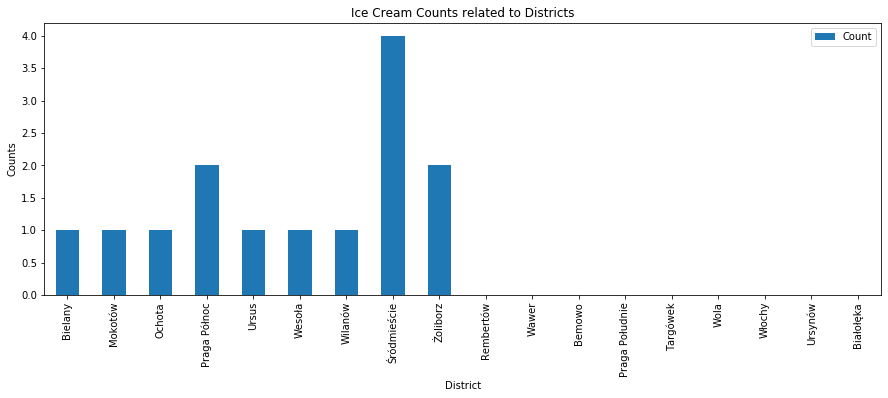

In [16]:
# get counts of Ice Cream Shops in each District
df_ice_dist =  district_icecream.groupby(['District']).count().rename(columns={"VenueCategory": "Count"})[['Count']]

#find districts that does not have any ice cream shop
noList = list(set(district_venues['District']) - set(district_icecream['District']))

#if exists , append districts without any ice cream shops.
if noList != []:
    df_ice_dist = df_ice_dist.append (pd.DataFrame( {'District' : noList  , 'Count': [0] * len(noList) } ).set_index('District'))

#df_ice_dist.reset_index(inplace=True)

# Find districts that does not have any ice cream shops.
noList = list(set(district_venues['District']))


######
#Draw graph
df_ice_dist[['Count']].plot(kind='bar',figsize=(15,5))
plt.title('Ice Cream Counts related to Districts')
plt.xlabel('District')
plt.ylabel('Counts')
plt.show()

According to the graph above, the 14 ice cream shops are concentrated in the first 9 districts of Warsaw. So the customer could open this business in one district with no ice cream shops and at the same time, one district as close to the city center as possible.

Let's now get the ratings of Ice Cream Shops.

In [17]:
def getVenueRaitings(venues):
    
    raitings = []
    likes =[]
    for venueId in venues:

        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venueId, CLIENT_ID, CLIENT_SECRET, VERSION)
        result = requests.get(url).json()
        try:
            rating = result['response']['venue']['rating']
            likes = result['response']['venue']['likes']['count']
        except:
            rating = None
            likes = None
        
        raitings.append((venueId, rating,likes))
 
    # convert the venues list into a DataFrame
    rating = pd.DataFrame(raitings)
    # define the column names
    rating.columns = ['VenueId', 'VenueRating','VenueLikes']

    return rating    

icecreamshops_raitings = getVenueRaitings(district_icecream['VenueId'].drop_duplicates())
icecreamshops_raitings.head()

,VenueId,VenueRating,VenueLikes
0,4c260864f7ced13ab185256d,8.6,195.0
1,5571f36c498eb08a128a8d3c,6.7,11.0
2,53b6d495498eb8b9a2326e03,7.9,39.0
3,536e0d70498ec624753cb810,8.3,20.0
4,4bdef33b17fdef3bedb14e36,8.5,51.0


In [18]:
# Merge raitings to ice cream shops
district_icecream = district_icecream.merge(icecreamshops_raitings)
district_icecream

,District,Latitude,Longitude,VenueName,VenueId,VenueLatitude,VenueLongitude,VenueDistance,VenueCategory,VenueRating,VenueLikes
0,Mokotów,52.19539,21.00850,Lodziarnia Malinova,4c260864f7ced13ab185256d,52.203823,21.009882,943,Ice Cream Shop,8.6,195.0
1,Bielany,52.27697,20.94778,Laziz,5571f36c498eb08a128a8d3c,52.283243,20.946934,700,Ice Cream Shop,6.7,11.0
2,Śródmieście,52.23560,21.01037,Lody Prawdziwe,53b6d495498eb8b9a2326e03,52.235187,21.006428,272,Ice Cream Shop,7.9,39.0
3,Śródmieście,52.23560,21.01037,Lodziarnia Limoni,536e0d70498ec624753cb810,52.237261,21.002209,586,Ice Cream Shop,8.3,20.0
4,Śródmieście,52.23560,21.01037,Häagen-Dazs,4bdef33b17fdef3bedb14e36,52.233882,21.019364,642,Ice Cream Shop,8.5,51.0
5,Śródmieście,52.23560,21.01037,N'Ice Cream Factory,572619e9498e9434472a9aeb,52.232856,21.017677,584,Ice Cream Shop,8.0,59.0
6,Ochota,52.21314,20.97069,Serwus Syrena,595fba36603d2a7c944940f6,52.207376,20.968592,657,Ice Cream Shop,8.9,14.0
7,Praga Północ,52.25680,21.02976,Lodziarnia Grycan,4f744800e4b0da86fd0ccbf0,52.254942,21.037118,542,Ice Cream Shop,7.0,8.0
8,Praga Północ,52.25680,21.02976,Pallone,5b421cf7c0f163002c9a5ece,52.253006,21.040974,873,Ice Cream Shop,7.5,7.0
9,Ursus,52.19786,20.89114,Amerykańskie Lody Kręcone,4e034ed6483bb38cf0f2695e,52.192862,20.892598,565,Ice Cream Shop,NaN,NaN


CLUSTER DISTRICTS USING AGGLOMERATIVE CLUSTERING

In [19]:
# one hot encoding
onehot = pd.get_dummies(district_venues[['VenueCategory']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
onehot['District'] = district_venues['District']

venues_grouped = onehot.groupby(["District"]).sum().reset_index()

fixed_columns =['District'] + list(district_venues['VenueCategory'].unique())
venues_grouped = venues_grouped[fixed_columns]

print("VENUES GROUPED BY DISTRICT:")
venues_grouped

VENUES GROUPED BY DISTRICT:


,District,Kebab Restaurant,Café,Dessert Shop,Italian Restaurant,Playground,Farmers Market,Pizza Place,Seafood Restaurant,Ramen Restaurant,Coffee Shop,Park,Ice Cream Shop,Market,Martial Arts Dojo,Music Venue,Theater,Polish Restaurant,College Cafeteria,Mediterranean Restaurant,Modern European Restaurant,Breakfast Spot,Burger Joint,Eastern European Restaurant,Performing Arts Venue,Cupcake Shop,Plaza,Jazz Club,Hostel,Vietnamese Restaurant,Convenience Store,Arcade,Moving Target,Bus Stop,Hotel,Gym,Gym / Fitness Center,Clothing Store,Multiplex,Sandwich Place,Grocery Store,Shopping Mall,African Restaurant,Supermarket,Restaurant,Bookstore,Fast Food Restaurant,Asian Restaurant,Pharmacy,Diner,Hardware Store,Beer Garden,Cosmetics Shop,Bistro,Kids Store,Pet Store,Lake,Tram Station,Train Station,Creperie,Bakery,Sushi Restaurant,Chinese Restaurant,Liquor Store,Pool,Juice Bar,Tennis Court,Neighborhood,Bar,Nightclub,Donut Shop,Indian Restaurant,Japanese Restaurant,Cemetery,History Museum,Lounge,Pub,Beer Store,Dim Sum Restaurant,Bus Line,Yoga Studio,Bus Station,Noodle House,Soccer Field,Pastry Shop,Tapas Restaurant,Dance Studio,Gastropub,Music Store,Massage Studio,Baby Store,Beer Bar,Drugstore,Mexican Restaurant,College Stadium,Food & Drink Shop,Flea Market,River,Metro Station,Falafel Restaurant,Turkish Restaurant,Concert Hall,Arts & Crafts Store,Greek Restaurant,Lebanese Restaurant,Chocolate Shop,Art Gallery,Wine Bar,Cocktail Bar,Thai Restaurant,Vegetarian / Vegan Restaurant,Gift Shop,Hotel Pool,Road,Spanish Restaurant,Movie Theater,Boutique,Dumpling Restaurant,Peruvian Restaurant,Hotel Bar,Museum,Racetrack,Church,Steakhouse,French Restaurant,Middle Eastern Restaurant,Ski Area,Outdoors & Recreation,Gym Pool,Theme Park,Sporting Goods Shop,Tennis Stadium,Dive Bar,Electronics Store,Go Kart Track,Department Store,Furniture / Home Store,Gas Station,General Entertainment,Platform,Train,Stadium,Flower Shop,Zoo Exhibit,Zoo,Aquarium,Comedy Club,Public Art,Sculpture Garden,New American Restaurant,Athletics & Sports,Outlet Mall,Lingerie Store,Pedestrian Plaza,Indie Movie Theater,Spa,Food Court,Bike Rental / Bike Share,Bed & Breakfast,Water Park,Garden,Bowling Alley,Parking,Historic Site,Beach,Taco Place,Art Museum,Fruit & Vegetable Store,Arts & Entertainment,Gun Range
0,Bemowo,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,3,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Białołęka,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Bielany,0,4,0,0,0,0,2,0,0,3,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,1,0,0,0,3,0,0,0,1,3,1,2,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,3,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Mokotów,1,6,2,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,3,2,2,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Ochota,0,3,1,2,0,1,1,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,2,2,0,0,0,2,0,1,2,0,0,0,1,0,1,0,0,2,1,2,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [20]:
# Create a new dataframe with most common venue categories.
def return_most_common_venues(row, num_top_venues):
    row_categories = row
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

columns = ['District','Total Number of Venues']
indicators = ['st', 'nd', 'rd']
# create columns according to number of top venues

for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venues'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venues'.format(ind+1))

# create a new dataframe
venues_most = pd.DataFrame(columns = columns)

for ind in range(venues_grouped.shape[0]):
    venues_most.loc[ind, 'District'] = venues_grouped.iloc[ind].District
    venues_most.loc[ind, 'Total Number of Venues'] = venues_grouped.iloc[ind,1:].sum()
    venues_most.iloc[ind, 2:] = return_most_common_venues(venues_grouped.iloc[ind, 1:], num_top_venues)

venues_most

,District,Total Number of Venues,1st Most Common Venues,2nd Most Common Venues,3rd Most Common Venues,4th Most Common Venues,5th Most Common Venues,6th Most Common Venues,7th Most Common Venues,8th Most Common Venues,9th Most Common Venues,10th Most Common Venues
0,Bemowo,17,Grocery Store,Ski Area,Flea Market,Restaurant,Supermarket,Middle Eastern Restaurant,Gym / Fitness Center,Gym,Tram Station,Convenience Store
1,Białołęka,8,Bus Station,Outdoors & Recreation,Movie Theater,Train Station,Fast Food Restaurant,Tennis Court,Gym,Tram Station,Lake,Pet Store
2,Bielany,41,Café,Bookstore,Bus Station,Grocery Store,Coffee Shop,Park,Asian Restaurant,Pizza Place,Bakery,Indian Restaurant
3,Mokotów,47,Café,Italian Restaurant,Breakfast Spot,Modern European Restaurant,Dessert Shop,Burger Joint,Eastern European Restaurant,Jazz Club,Performing Arts Venue,Cupcake Shop
4,Ochota,64,Café,Platform,Hotel,Fast Food Restaurant,Clothing Store,Convenience Store,Vietnamese Restaurant,Pharmacy,Italian Restaurant,Go Kart Track
5,Praga Południe,43,Coffee Shop,Bookstore,Fast Food Restaurant,Asian Restaurant,Supermarket,Italian Restaurant,Pet Store,Hotel,Gym,Gym / Fitness Center
6,Praga Północ,77,Café,Bar,Zoo Exhibit,Diner,Fast Food Restaurant,Bistro,Music Venue,Road,Italian Restaurant,Plaza
7,Rembertów,5,Gun Range,Gym Pool,Park,Supermarket,Café,Sushi Restaurant,Bakery,Creperie,Train Station,Tram Station
8,Targówek,17,Bus Station,Pizza Place,Eastern European Restaurant,Clothing Store,Liquor Store,Train Station,Falafel Restaurant,Metro Station,River,Gym / Fitness Center
9,Ursus,25,Bus Station,Hotel,Train Station,Park,Lingerie Store,Supermarket,Clothing Store,Gym,Sporting Goods Shop,Chocolate Shop


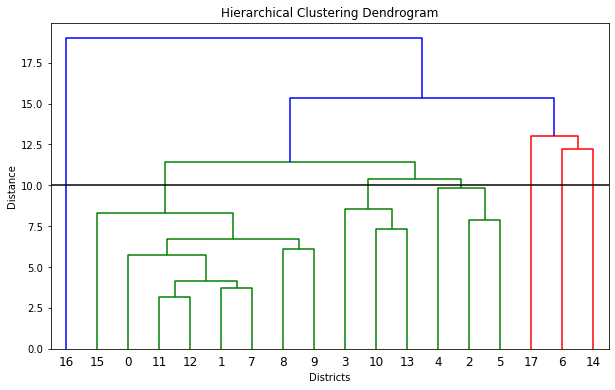

In [21]:
# Find the number of clusters
import scipy.cluster.hierarchy as shc

data = venues_grouped.iloc[:,3:]
plt.figure(figsize=(10, 6))   
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Districts')
plt.ylabel('Distance')
plt.axhline(y=10, c='k')
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [22]:
# We can divide into 3 clusters
from sklearn.cluster import AgglomerativeClustering

kclusters= 6
cluster = AgglomerativeClustering(n_clusters=kclusters, affinity='euclidean', linkage='ward')  
clusterresult = cluster.fit_predict(data)

venues_grouped['DistrictCluster'] = clusterresult
venues_cluster= df.merge(venues_grouped[['District','DistrictCluster']])
venues_cluster =venues_cluster.merge(venues_most[['District','1st Most Common Venues','2nd Most Common Venues','3rd Most Common Venues']])
venues_cluster

,District,Population,Area,Latitude,Longitude,DistrictCluster,1st Most Common Venues,2nd Most Common Venues,3rd Most Common Venues
0,Mokotów,"220,682",35.4 km,52.19539,21.00850,0,Café,Italian Restaurant,Breakfast Spot
1,Praga Południe,"178,665",22.4 km,52.23633,21.09840,0,Coffee Shop,Bookstore,Fast Food Restaurant
2,Ursynów,"145,938",48.6 km,52.15418,21.03786,0,Pizza Place,Burger Joint,Convenience Store
3,Wola,"137,519",19.26 km,52.23903,20.97123,5,Café,Pizza Place,Restaurant
4,Bielany,"132,683",32.3 km,52.27697,20.94778,0,Café,Bookstore,Bus Station
5,Targówek,"123,278",24.37 km,52.27726,21.06594,2,Bus Station,Pizza Place,Eastern European Restaurant
6,Śródmieście,"122,646",15.57 km,52.23560,21.01037,3,Coffee Shop,Café,Ice Cream Shop
7,Bemowo,"115,873",24.95 km,52.25269,20.91244,2,Grocery Store,Ski Area,Flea Market
8,Białołęka,"96,588",73.04 km,52.31097,20.99324,2,Bus Station,Outdoors & Recreation,Movie Theater
9,Ochota,"84,990",09.7 km,52.21314,20.97069,0,Café,Platform,Hotel


In [23]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)
warsaw_center = [latitude, longitude]
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
for lat, lon, poi, cluster,Population  in zip(venues_cluster['Latitude'], venues_cluster['Longitude'], venues_cluster['District'], venues_cluster['DistrictCluster'],venues_cluster['Population']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster)+ ' ' + str(Population), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
folium.Marker(warsaw_center).add_to(map_clusters)
folium.Circle(warsaw_center, radius=2000, fill=False, color='white').add_to(map_clusters)
folium.Circle(warsaw_center, radius=4000, fill=False, color='white').add_to(map_clusters)
folium.Circle(warsaw_center, radius=6000, fill=False, color='white').add_to(map_clusters)
folium.Circle(warsaw_center, radius=10000, fill=False, color='black').add_to(map_clusters)         
map_clusters

In [24]:
print(venues_cluster.groupby(['DistrictCluster','1st Most Common Venues' ]).count()[['District']].rename(columns={"District": "District Count"}))

print(venues_cluster.groupby(['DistrictCluster','2nd Most Common Venues' ]).count()[['District']].rename(columns={"District": "District Count"}))
venues_cluster.groupby(['DistrictCluster','3rd Most Common Venues' ]).count()[['District']].rename(columns={"District": "District Count"})

                                        District Count
DistrictCluster 1st Most Common Venues                
0               Café                                 3
                Coffee Shop                          1
                Italian Restaurant                   1
                Pizza Place                          1
1               Italian Restaurant                   1
2               Bus Station                          5
                Grocery Store                        1
                Gun Range                            1
                Supermarket                          1
3               Coffee Shop                          1
4               Café                                 1
5               Café                                 1
                                           District Count
DistrictCluster 2nd Most Common Venues                   
0               Bookstore                               2
                Burger Joint                            

District Count
DistrictCluster 3rd Most Common Venues                     
0               Breakfast Spot                            1
                Bus Station                               1
                Convenience Store                         1
                Fast Food Restaurant                      1
                Grocery Store                             1
                Hotel                                     1
1               Bakery                                    1
2               Café                                      2
                Eastern European Restaurant               1
                Flea Market                               1
                Market                                    1
                Movie Theater                             1
                Park                                      1
                Train Station                             1
3               Ice Cream Shop                            1
4               Zoo Exhibit                               1
5               Restaurant                                1

Taking into account the previous tables and maps we have two main suggestions about opening an Ice Cream Shop in Warsaw:

1-In Śródmieście district, in the city center, there are 4 Ice Cream shops. Being the city center is a good advantage, but the customer must compete with 4 other venues.
2-We can also think on the Ice Cream Shop as a complement to venues like Restaurants or Cafés, so clusters 0 and 5 seems to be the more convenient for that since there are more venues like these and almost no Ice Cream Shops. So we can split this option into this:
    2a-In cluster zero, both Ochota and Mokotow districts have 1 Ice Cream Shop each, although Ochota is closer to city center, but less population(84,990) and Mokotov is a bit far but with much more population (220,682)
    2b-In cluster 5, the Wola district with 137,519 habitants is even closer from the city center than the ones in cluster zero and also with no Ice Cream Shops.
    
So the final conclusion would be to open the venue in Śródmieście district, in the city center, where there are 4 Ice Cream shops, or in Wola district which is not city center but close without any competence in the business purposed.
